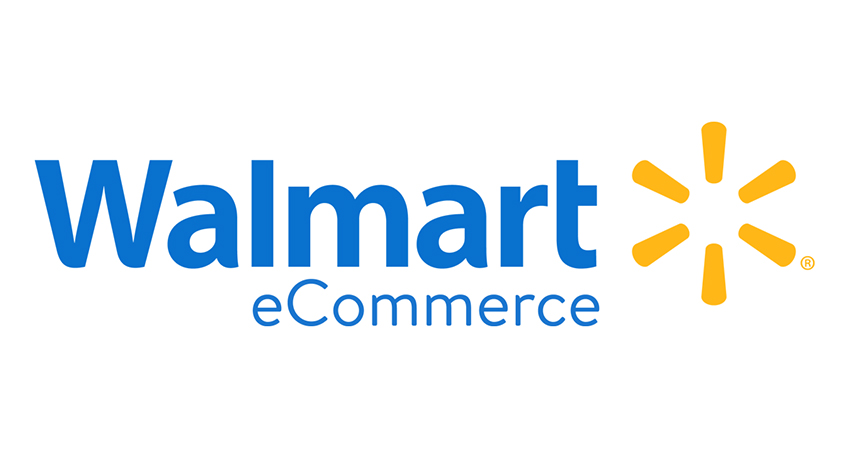

Walmart is the biggest retail store in the United States. Just like others, they have been expanding their e-commerce part of the business. By the end of 2022, e-commerce represented a roaring $80 billion in sales, which is 13% of total sales of Walmart. One of the main factors that affects their sales is public holidays, like the Super Bowl, Labour Day, Thanksgiving, and Christmas. 

In this project, you have been tasked with creating a data pipeline for the analysis of supply and demand around the holidays, along with conducting a preliminary analysis of the data. You will be working with two data sources: grocery sales and complementary data. You have been provided with the `grocery_sales` table in `PostgreSQL` database with the following features:

# `grocery_sales`
- `"index"` - unique ID of the row
- `"Store_ID"` - the store number
- `"Date"` - the week of sales
- `"Weekly_Sales"` - sales for the given store

Also, you have the `extra_data.parquet` file that contains complementary data:

# `extra_data.parquet`
- `"IsHoliday"` - Whether the week contains a public holiday - 1 if yes, 0 if no.
- `"Temperature"` - Temperature on the day of sale
- `"Fuel_Price"` - Cost of fuel in the region
- `"CPI"` – Prevailing consumer price index
- `"Unemployment"` - The prevailing unemployment rate
- `"MarkDown1"`, `"MarkDown2"`, `"MarkDown3"`, `"MarkDown4"` - number of promotional markdowns
- `"Dept"` - Department Number in each store
- `"Size"` - size of the store
- `"Type"` - type of the store (depends on `Size` column)

You will need to merge those files and perform some data manipulations. The transformed DataFrame can then be stored as the `clean_data` variable containing the following columns:
- `"Store_ID"`
- `"Month"`
- `"Dept"`
- `"IsHoliday"`
- `"Weekly_Sales"`
- `"CPI"`
- "`"Unemployment"`"

After merging and cleaning the data, you will have to analyze monthly sales of Walmart and store the results of your analysis as the `agg_data` variable that should look like:

|  Month | Weekly_Sales  | 
|---|---|
| 1.0  |  33174.178494 |
|  2.0 |  34333.326579 |
|  ... | ...  |  

Finally, you should save the `clean_data` and `agg_data` as the csv files.

It is recommended to use `pandas` for this project. 

Build a data pipeline using custom functions to extract, transform, aggregate, and load e-commerce data. The SQL query for `grocery_sales` and the `extract()` function have already been implemented.

Start the project proceed with the following steps:

1. Implement a function named `transform()` with one argument, taking `merged_df` as input, filling missing numerical values (using any method of your choice), adding a column `"Month"`, keeping the rows where the weekly sales are over $10,000 and drops the unnecessary columns. Ultimately, it should return a DataFrame and be stored as the `clean_data` variable.

2. Implement the function `avg_weekly_sales_per_month` with one argument (the cleaned data). This function will calculate the average monthly sales. For implementing this function you must select the "Month" and "Weekly_Sales" columns as they are the only ones needed for this analysis, then create a chain operation with `groupby()`, `agg()`, `reset_index()`, and `round()` functions, then group by the "Month" column and calculate the average monthly sales, then call `reset_index()` to start a new index order and finally round the results to two decimal places.

3. Create a function called `load()` that takes the cleaned and aggregated DataFrames, and their paths, and saves them as `clean_data.csv` and `agg_data.csv` respectively, without an index.

4. Lastly, define a `validation()` function that checks whether the two csv files from the `load()` exist in the current working directory.

In [26]:
-- Overview of SQL data
SELECT * FROM grocery_sales
LIMIT 10

,index,Store_ID,Date,Dept,Weekly_Sales
0,0,1,2010-02-05,1,24924.50
1,1,1,2010-02-05,26,11737.12
2,2,1,2010-02-05,17,13223.76
3,3,1,2010-02-05,45,37.44
4,4,1,2010-02-05,28,1085.29
5,5,1,2010-02-05,79,46729.77
6,6,1,2010-02-05,55,21249.31
7,7,1,2010-02-05,5,32229.38
8,8,1,2010-02-05,58,7659.97
9,9,1,2010-02-05,7,NaN


In [27]:
-- Data Length
SELECT COUNT(*) FROM grocery_sales

,count
0,231522


In [28]:
# import libraries
import pandas as pd
import os

# Extract function as implemented
def extract(store_data, extra_data):
    extra_df = pd.read_parquet(extra_data)
    merged_df = store_data.merge(extra_df, on = "index")
    
    return extra_df, merged_df

# Call the extract() function and store the results
extra_df, merged_df = extract(grocery_sales, "extra_data.parquet")

# Display the dataframes
display(extra_df)
display(merged_df)

,index,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0
1,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0
2,2,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0
3,3,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,NaN,3.0,151315.0
4,4,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,NaN,3.0,151315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231517,232414,0,55.75,4.192,0.0,0.0,0.0,0.0,0.0,134.514367,8.212,3.0,203819.0
231518,232415,0,55.75,4.192,0.0,0.0,0.0,0.0,0.0,134.514367,8.212,3.0,203819.0
231519,232416,0,55.75,4.192,0.0,0.0,0.0,0.0,0.0,134.514367,8.212,3.0,203819.0
231520,232417,0,55.75,4.192,0.0,0.0,0.0,0.0,0.0,134.514367,8.212,3.0,203819.0


,index,Store_ID,Date,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0
1,1,1,2010-02-05,26,11737.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0
2,2,1,2010-02-05,17,13223.76,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0
3,3,1,2010-02-05,45,37.44,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,NaN,3.0,151315.0
4,4,1,2010-02-05,28,1085.29,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,NaN,3.0,151315.0
5,5,1,2010-02-05,79,46729.77,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,NaN,3.0,151315.0
6,6,1,2010-02-05,55,21249.31,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,NaN,3.0,151315.0
7,7,1,2010-02-05,5,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,NaN,3.0,151315.0
8,8,1,2010-02-05,58,7659.97,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,NaN,3.0,151315.0
9,9,1,2010-02-05,7,NaN,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,NaN,3.0,151315.0


In [29]:
display(merged_df.info())
display(merged_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         10 non-null     int64         
 1   Store_ID      10 non-null     int64         
 2   Date          10 non-null     datetime64[ns]
 3   Dept          10 non-null     int64         
 4   Weekly_Sales  9 non-null      float64       
 5   IsHoliday     10 non-null     int64         
 6   Temperature   10 non-null     float64       
 7   Fuel_Price    10 non-null     float64       
 8   MarkDown1     10 non-null     float64       
 9   MarkDown2     10 non-null     float64       
 10  MarkDown3     10 non-null     float64       
 11  MarkDown4     10 non-null     float64       
 12  MarkDown5     10 non-null     float64       
 13  CPI           10 non-null     float64       
 14  Unemployment  3 non-null      float64       
 15  Type          10 non-null     float64      

None

index           0
Store_ID        0
Date            0
Dept            0
Weekly_Sales    1
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    7
Type            0
Size            0
dtype: int64

In [30]:
# look at merged_df data description
merged_df[['Weekly_Sales', 'CPI', 'Unemployment']].describe()

,Weekly_Sales,CPI,Unemployment
count,9.000000,10.000000,3.000
mean,17652.948889,211.096358,8.106
std,15260.287456,0.000000,0.000
min,37.440000,211.096358,8.106
25%,7659.970000,211.096358,8.106
50%,13223.760000,211.096358,8.106
75%,24924.500000,211.096358,8.106
max,46729.770000,211.096358,8.106


In [31]:
# Create the transform() function with one parameter: "raw_data"
def transform(raw_data):
  # Set inplace = True to do the replacing on the current DataFrame
    raw_data.fillna(
      {
          'CPI': raw_data['CPI'].median(),
          'Weekly_Sales': raw_data['Weekly_Sales'].median(),
          'Unemployment': raw_data['Unemployment'].median(),
      }, inplace = True
    )

    # Define the type of the "Date" column and its format
    raw_data["Date"] = pd.to_datetime(raw_data["Date"], format = "%Y-%m-%d")
    
    # Extract the month value from the "Date" column to calculate monthly sales later on
    raw_data["Month"] = raw_data["Date"].dt.month

    # Filter the entire DataFrame using the "Weekly_Sales" column. Use .loc to access a group of rows
    raw_data = raw_data.loc[raw_data["Weekly_Sales"] > 10000, :]
    
    # Drop unnecessary columns. Set axis = 1 to specify that the columns should be removed
    raw_data = raw_data.drop(["index", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Type", "Size", "Date"], axis = 1)
    
    return raw_data

In [56]:
# Call the transform() function and pass the merged DataFrame
clean_data = transform(merged_df)
clean_data

,Store_ID,Dept,Weekly_Sales,IsHoliday,CPI,Unemployment,Month
0,1,1,24924.500000,0,211.096358,8.106,2
1,1,26,11737.120000,0,211.096358,8.106,2
2,1,17,13223.760000,0,211.096358,8.106,2
5,1,79,46729.770000,0,211.096358,8.106,2
6,1,55,21249.310000,0,211.096358,8.106,2
7,1,5,32229.380000,0,211.096358,8.106,2
9,1,7,17652.948889,0,211.096358,8.106,2


In [57]:
# Create the avg_weekly_sales_per_month function that takes in the cleaned data from the last step
def avg_weekly_sales_per_month(clean_data):
    # Select relevant columns
    holiday_sales = clean_data[['Month', 'Weekly_Sales']]
    
    # Group by "Month" and calculate the average monthly sales
    holiday_sales = (holiday_sales.groupby("Month")
                      .agg(Avg_Sales=("Weekly_Sales", "median"))
                      .reset_index()
                      .round(2))
    
    return holiday_sales

In [58]:
# Call the avg_weekly_sales_per_month() function and pass the cleaned DataFrame
agg_data = avg_weekly_sales_per_month(clean_data)
agg_data

,Month,Avg_Sales
0,2,21249.31


In [35]:
def load(full_data, full_data_file_path, agg_data, agg_data_file_path):
    # Save both DataFrames as csv files without the index columns
    full_data.to_csv(full_data_file_path, index=False)
    agg_data.to_csv(agg_data_file_path, index=False)

In [36]:
# Call the load() function and pass the cleaned and aggregated DataFrames with their paths    
load(clean_data, "clean_data.csv", agg_data, "agg_data.csv")

In [37]:
# Create the validation() function with one parameter: file_path - to check whether the previous function was correctly executed
def validation(file_path):
  	# Use the "os" package to check whether a path exists
    file_exists = os.path.exists(file_path)
    # Raise an exception if the path doesn't exist, hence, if there is no file found on a given path
    if not file_exists:
        raise Exception(f"There is no file at the path {file_path}")

In [38]:
# Call the validation() function and pass first, the cleaned DataFrame path, and then the aggregated DataFrame path
validation("clean_data.csv")
validation("agg_data.csv")

display("clean_data.csv", clean_data)
display("agg_data.csv", agg_data)

'clean_data.csv'

,Store_ID,Dept,Weekly_Sales,IsHoliday,CPI,Unemployment,Month
0,1,1,24924.50,0,211.096358,8.106,2
1,1,26,11737.12,0,211.096358,8.106,2
2,1,17,13223.76,0,211.096358,8.106,2
5,1,79,46729.77,0,211.096358,8.106,2
6,1,55,21249.31,0,211.096358,8.106,2
7,1,5,32229.38,0,211.096358,8.106,2
9,1,7,13223.76,0,211.096358,8.106,2


'agg_data.csv'

,Month,Avg_Sales
0,2,21249.31


In [39]:
month_with_best_avg_sales = agg_data.sort_values('Avg_Sales', ascending=False).iloc[0]
month_with_best_avg_sales

Month            2.00
Avg_Sales    21249.31
Name: 0, dtype: float64

In [42]:
print(f'Month with the best average sales is {int(month_with_best_avg_sales["Month"])} with Average Sales of {month_with_best_avg_sales["Avg_Sales"]}')

Month with the best average sales is 2 with Average Sales of 21249.31
